<a href="https://colab.research.google.com/github/xli2522/CRAQ2022-McGill/blob/main/swapping_Fourier_amp_phase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Wrote Adrian_gray.png


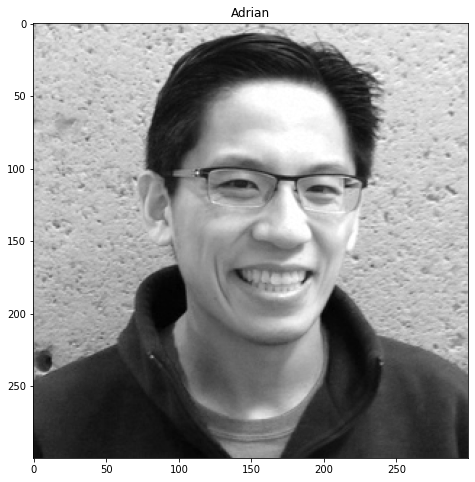

Close plot to continue
Wrote CookieMonster_gray.png


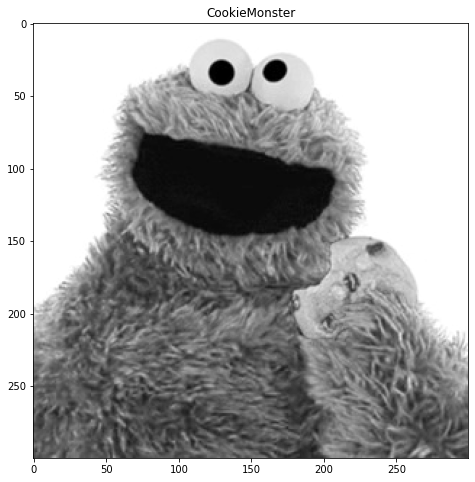

Close plot to continue
Wrote Adrian_mags.png


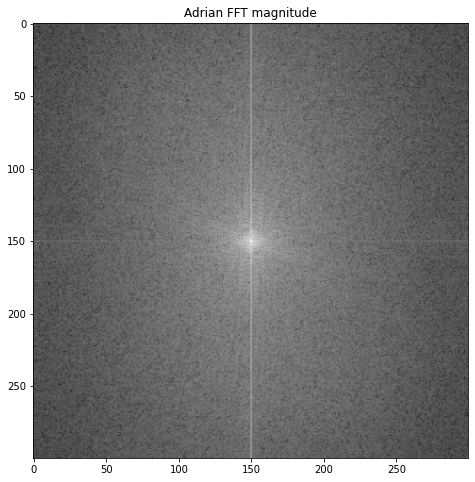

Close plot to continue
Wrote CookieMonster_mags.png


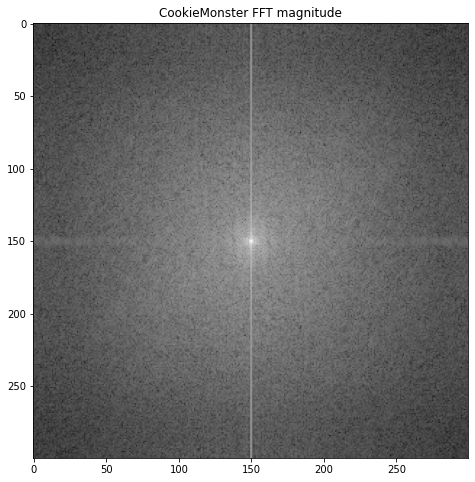

Close plot to continue
Wrote Adrian_phases.png


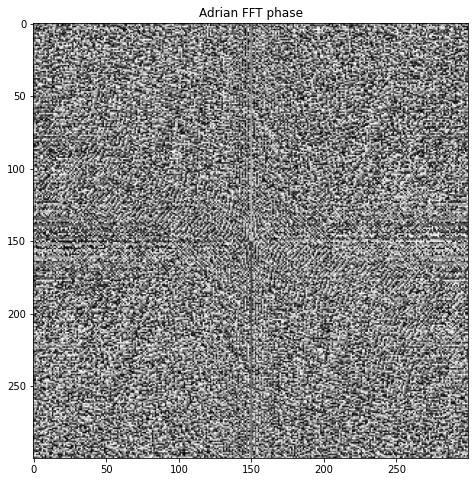

Close plot to continue
Wrote CookieMonster_phases.png


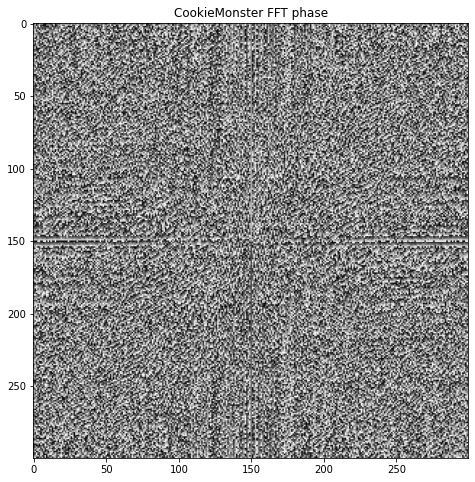

Close plot to continue
Wrote FrankenAdrian.png


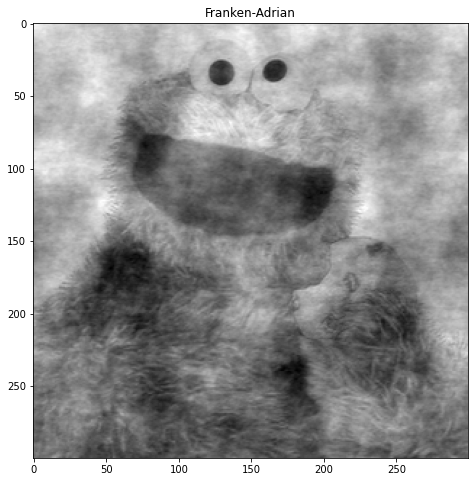

Close plot to continue
Wrote FrankenCookieMonster.png


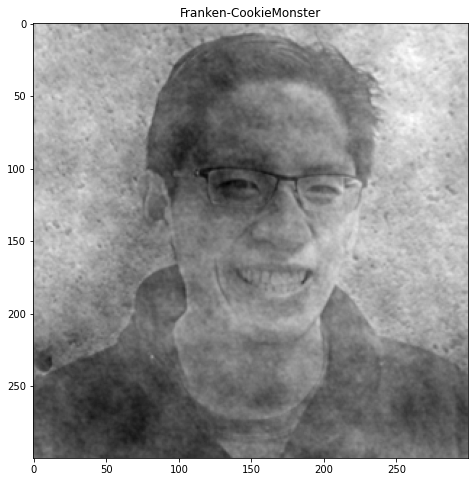

Close plot to continue


In [2]:
"""Swapping phases and magnitudes in images.
"""

import numpy
from numpy import fft
import pylab
import matplotlib.image as image
import matplotlib.colors as colors
import IPython

#-------------------------------------------------------------------------------------------------------------
def loadImage(fileName):
    """Loads in an image, converts it to a greyscale numpy array for us to play with.
    """
    img=image.imread(fileName)
    hsv=colors.rgb_to_hsv(img)
    gray=hsv[:, :, 2]

    return gray

#-------------------------------------------------------------------------------------------------------------
def calcMagsAndPhases(farr):
    """Calculates magnitudes and phases of FFT'ed array.
    """
    mags=abs(farr)
    phases=numpy.angle(farr)
    
    return mags, phases

#-------------------------------------------------------------------------------------------------------------
def saveImage(arr, fileName, logScaling = False, title = None):
    """Save image.
    """
    pylab.figure(figsize=(8, 8))
    if logScaling == False:
        pylab.imshow(arr, cmap=pylab.get_cmap('gray'))
    else:
        pylab.imshow(arr, cmap=pylab.get_cmap('gray'), norm=colors.LogNorm(vmin=arr.min(), vmax=arr.max()))
    if title is not None:
        pylab.title(title)
    pylab.savefig(fileName)
    print('Wrote',fileName)
    pylab.show()
    print('Close plot to continue')
    
#-------------------------------------------------------------------------------------------------------------
# Main

if __name__ == '__main__':

    # Load images and convert to grayscale
    adrian=loadImage("sample_data/Adrian.jpg")
    monster=loadImage("sample_data/CookieMonster.jpg")
    saveImage(adrian, "Adrian_gray.png", title='Adrian')
    saveImage(monster, "CookieMonster_gray.png", title='CookieMonster')

    # Take the FFTs of both images
    fadrian=fft.fft2(adrian)
    fmonster=fft.fft2(monster)

    # Calculate mags and phases
    adrianMags, adrianPhases=calcMagsAndPhases(fadrian)
    monsterMags, monsterPhases=calcMagsAndPhases(fmonster)
    # Plot magnitudes and phases separately
    saveImage(fft.fftshift(adrianMags), "Adrian_mags.png", logScaling = True, title='Adrian FFT magnitude')
    saveImage(fft.fftshift(monsterMags), "CookieMonster_mags.png", logScaling = True, title='CookieMonster FFT magnitude')
    saveImage(fft.fftshift(adrianPhases), "Adrian_phases.png", logScaling = False, title='Adrian FFT phase')
    saveImage(fft.fftshift(monsterPhases), "CookieMonster_phases.png", logScaling = False, title='CookieMonster FFT phase')

    # Swap phases
    fadrian = adrianMags*numpy.exp(1J*monsterPhases)  # Adrian gets monster's phases
    fmonster = monsterMags*numpy.exp(1J*adrianPhases)  # CookieMonster gets Adrian's phases

    ## Or... uncomment to swap magnitudes instead
    #fadrian = monsterMags*numpy.exp(1J*adrianPhases)  # Adrian gets monster's magnitudes
    #fmonster = adrianMags*numpy.exp(1J*monsterPhases)  # CookieMonster gets Adrian's magnitudes

    ## Create magnitudes consisting of random numbers between zero and one
    #randomMag = numpy.random.rand(numpy.shape(adrianMags)[0], numpy.shape(adrianMags)[1])
    #fadrian = randomMag*numpy.exp(1J*adrianPhases)      # Give Adrian random magnitudes
    #fmonster = randomMag*numpy.exp(1J*monsterPhases)      # Give monster random magnitudes

    ## Create phases consisting of random numbers between zero and pi
    #randomPhase = numpy.random.rand(numpy.shape(adrianMags)[0], numpy.shape(adrianMags)[1]) * numpy.pi
    #fadrian = adrianMags*numpy.exp(1J*randomPhase)      # Give Adrian random phases
    #fmonster = monsterMags*numpy.exp(1J*randomPhase)      # Give monster random phases

    # Inverse transform the "Franken-FFTs"
    ifadrian=fft.ifft2(fadrian).real
    ifmonster=fft.ifft2(fmonster).real

    # Save results
    saveImage(ifadrian, "FrankenAdrian.png", title='Franken-Adrian')
    saveImage(ifmonster, "FrankenCookieMonster.png", title='Franken-CookieMonster')
